In [131]:
with open('ТПУ_377_образец2.txt', 'r', encoding='utf-8') as f:
  text = f.read()
import string
text = text.lower()
spec_chars = string.punctuation + '\n\xa0«»\t—...' #небольшие дополнения к пунктуации библиотеки string

In [132]:
text = "".join([ch for ch in text if ch not in spec_chars]) #перебираем текст, т.е убираем пунктуацию
text = "".join([ch for ch in text if ch not in string.digits])  #убираем числа


In [ ]:
!pip install nltk

In [ ]:
from nltk import word_tokenize
from nltk import download
download ('punkt')
download ('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')


In [134]:
text_tokens = word_tokenize(text) #токенизируем текст


In [135]:
stopwords_2 = []
stopwords_2 = ['для', 'из', 'это', '„','“']
stopwords.extend(stopwords_2)

text_tokens = [token for token in text_tokens if token not in stopwords]

In [ ]:
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [136]:
words_lemmatized = []
for word in text_tokens:
    result = morph.parse(word)
    most_probable_result = result[0] ## почему мы берем первый разбор? см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    normal_form = most_probable_result.normal_form
    words_lemmatized.append(normal_form)

In [116]:
#import nltk

In [137]:
from collections import Counter
Counter(words_lemmatized).most_common(15)

[('контроль', 11),
 ('метод', 7),
 ('неразрушающий', 6),
 ('тепловой', 5),
 ('материал', 5),
 ('лаборатория', 5),
 ('учёный', 4),
 ('комплекс', 4),
 ('водородный', 4),
 ('энергетика', 4),
 ('который', 4),
 ('тпу', 3),
 ('композит', 3),
 ('исследование', 3),
 ('разрабатывать', 2)]

In [138]:
freq_bigramms = Counter(nltk.ngrams(text_tokens, 2)) #разбираем на биграмм

In [139]:
text2 = nltk.Text(freq_bigramms.most_common(10)) #делаем из биграмм текст (У нас какой-то список)

In [140]:
text2

<Text: (('неразрушающего', 'контроля'), 5) (('ученые', 'тпу'), 2) (('тпу', 'разрабатывают'), 2) (('универсальный', 'комплекс'), 2) (('комплекс', 'неразрушающего'), 2) (('водородной', 'атомной'), 2) (('атомной', 'энергетике'), 2) (('ультразвуковой', 'тепловой'), 2)...>

In [23]:
import pandas as pd
b = [[text, Counter(words_lemmatized).most_common(15), text2]]
b_df = pd.DataFrame(b,  columns=['Текст', 'Ключевые слова', 'Биграммы']) 
b_df

,Текст,Ключевые слова,Биграммы
0,апреля года санктпетербургский политехнически...,"[(который, 8), (спорт, 7), (светлана, 6), (вуз...","(((светлана, журова), 4), ((олимпийская, чемпи..."


In [141]:
c = [[text, Counter(words_lemmatized).most_common(15), text2]]
c_df = pd.DataFrame(c,  columns=['Текст', 'Ключевые слова', 'Биграммы']) 
b_df = b_df.append(c_df)
b_df

,Текст,Ключевые слова,Биграммы
0,апреля года санктпетербургский политехнически...,"[(который, 8), (спорт, 7), (светлана, 6), (вуз...","(((светлана, журова), 4), ((олимпийская, чемпи..."
0,спомарта набазе спбпу прошел финал национально...,"[(производственный, 14), (технология, 13), (пе...","(((производственные, технологии), 10), ((перед..."
0,инструкторы общественной организации волонтеры...,"[(курс, 4), (помощь, 4), (спбп, 3), (первый, 3...","(((волонтерыспасатели, санктпетербурга), 2), (..."
0,актуальные задачи современной химической науки...,"[(химия, 9), (молекулярный, 9), (машина, 9), (...","(((молекулярных, машин), 4), ((института, хими..."
0,марта рейтинговое агентство raex впервые опубл...,"[(вуз, 5), (направление, 5), (наш, 5), (свой, ...","(((наш, вуз), 2), ((втоп, лучших), 2), ((машин..."
0,ученые тпу разрабатывают универсальный комплек...,"[(контроль, 11), (метод, 7), (неразрушающий, 6...","(((неразрушающего, контроля), 5), ((ученые, тп..."


ВИЗУАЛИЗАЦИЯ

In [ ]:
!pip install wordcloud

In [66]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline

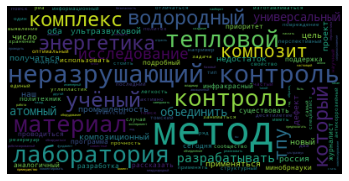

In [142]:
text_raw = " ".join(words_lemmatized)

wordcloud = WordCloud().generate(text_raw)
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file('ТПУ_377_образец2.png')


(-0.5, 499.5, 299.5, -0.5)

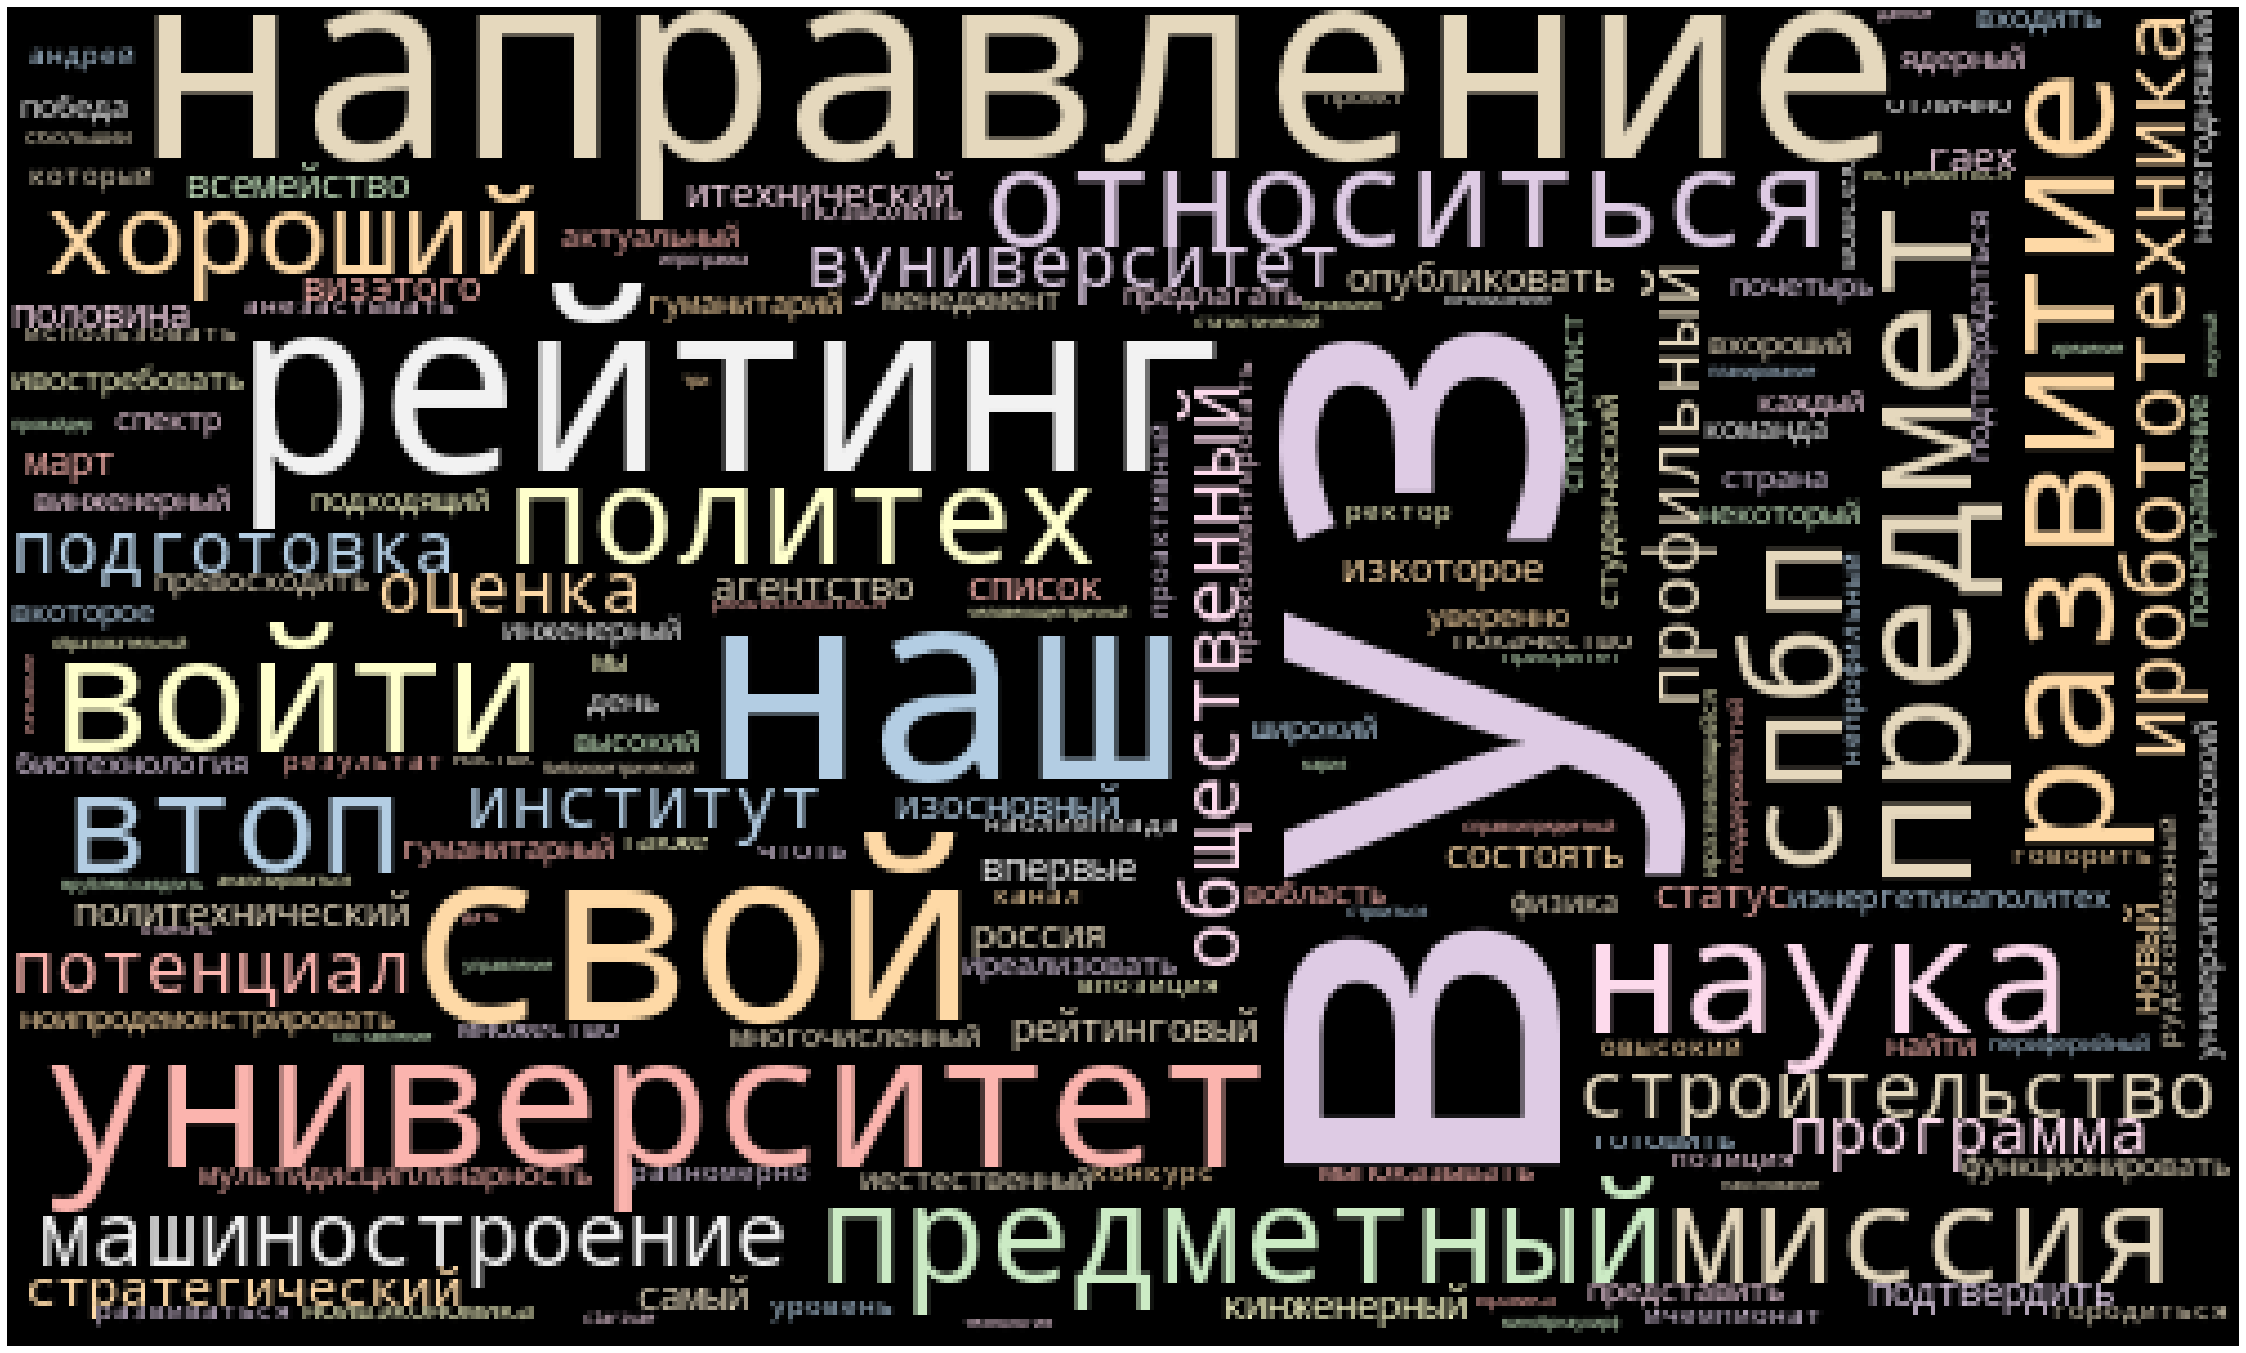

In [129]:
wordcloud = WordCloud(width = 500, 
                      height = 300, 
                      background_color='black', 
                      colormap='Pastel1').generate(', '.join(words_lemmatized))
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(wordcloud)
plt.axis("off")


In [109]:
wordcloud.to_file('СПбПУ_5.png')

In [ ]:
b_df.to_excel('ТПУ_данные.xlsx')